# Airbnb_Rental_Price_Prediction_based_on_Subjective_and_Objective_Information

Reference:https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.752139a9Bp6sPW&postId=77278

# EDA

## import pakages

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy.special import jn
from IPython.display import display, clear_output
import time
import pandas as pd 
import seaborn as sns 
import pinyin
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']='SimHei' 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing as pp
import scipy

## 进行单变量分析

1.主要考察数据的中位数、均值、四分位数等位置指标

2.考察数据标准差、方差、极差等指标

3.考察数据的偏度和峰度，研究数据的偏斜情况(利用scipy库中的skew和kurtosis)

In [2]:
data1=pd.read_csv("short_term_rental_dataset/listings.csv",index_col=0) # 使用index_col参数使得第一列为索引，方便数据查看

In [3]:
nbh = data1.neighbourhood
nbh = [x.split("/")[-1].strip().lower() for x in nbh]
nbh = [pinyin.get(x, format="strip", delimiter="").capitalize() for x in nbh]

data1['neighbourhood'] = nbh

In [4]:
data1.head()   # 查看前五条数据

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,Dongchengqu,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
161902,cozy studio in center of Beijing,707535,Robert,NaN,Dongchengqu,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
162144,"nice studio near subway, sleep 4",707535,Robert,NaN,Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [5]:
data1.isnull().sum() 

name                                  1
host_id                               0
host_name                             0
neighbourhood_group               28452
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11158
reviews_per_month                 11158
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
data=data1.copy() # 一般情况下，对于数据的任何处理都要首先备份数据，以防止后续的处理错误，及时挽回损失
data=data.drop("neighbourhood_group",axis=1) # axis可取0和1，分别表示行和列
data.head() # 查看处理后的数据情况

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
44054,Modern and Comfortable Living in CBD,192875,East Apartments,Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
128496,Heart of Beijing: House with View 2,467520,Cindy,Dongchengqu,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
161902,cozy studio in center of Beijing,707535,Robert,Dongchengqu,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
162144,"nice studio near subway, sleep 4",707535,Robert,Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [7]:
def neighbourhood_str(data):
    neighbourhoods=[]
    list=data["neighbourhood"].str.findall("\w+").tolist()
    for i in list:
        neighbourhoods.append(i[0])
    return neighbourhoods

data["neighbourhood"]=neighbourhood_str(data)

data.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
44054,Modern and Comfortable Living in CBD,192875,East Apartments,Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
128496,Heart of Beijing: House with View 2,467520,Cindy,Dongchengqu,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
161902,cozy studio in center of Beijing,707535,Robert,Dongchengqu,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
162144,"nice studio near subway, sleep 4",707535,Robert,Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


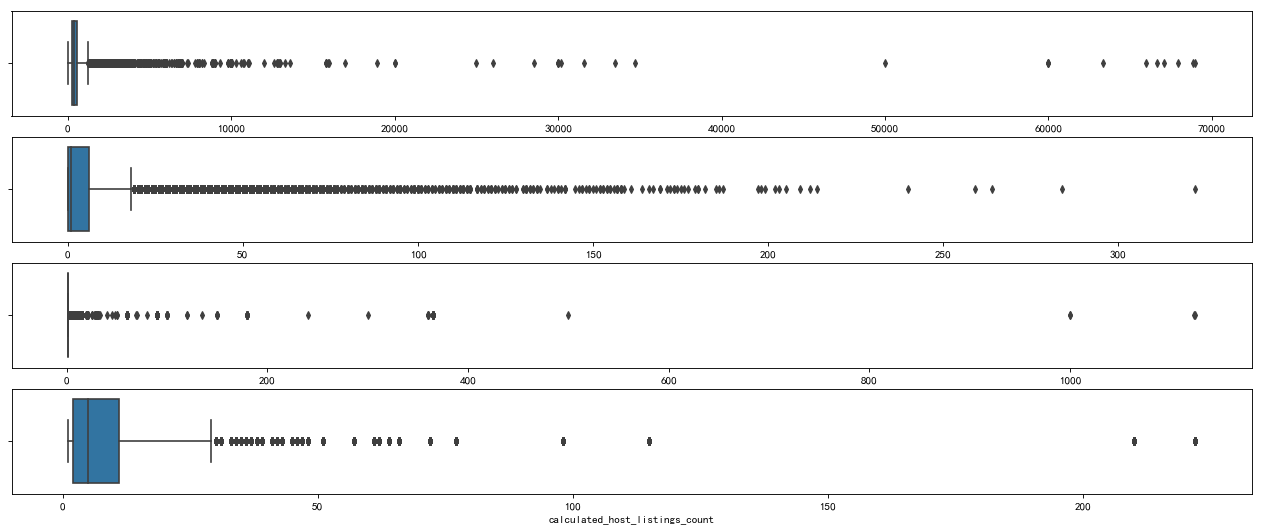

In [8]:
subsets=["neighbourhood","room_type","price","number_of_reviews","calculated_host_listings_count","availability_365"]
data2=data[subsets]
data2.head()

"""选择一部分测试数据画出盒型图进行数据可视化展示(数值型数据)"""

test_subsets=["price","number_of_reviews","minimum_nights","calculated_host_listings_count"]
fig,ax=plt.subplots(len(test_subsets),1,figsize=(20,8),dpi=80)
for i,test_subset in enumerate(test_subsets):
    sns.boxplot(data1[test_subset],ax=ax[i],whis=2,orient="h")

### 对房间的类型进行分析

                 number_of_reviews       price
room_type                                     
Entire home/apt           6.873371  746.479151
Private room              7.610083  430.681236
Shared room               6.445449  299.192887


count               28452
unique                  3
top       Entire home/apt
freq                16955
Name: room_type, dtype: object

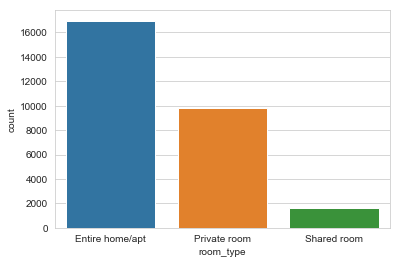

In [9]:
plt.rcParams['font.sans-serif']='SimHei'
sns.set_style("whitegrid")
sns.countplot(x="room_type",data=data) #利用seaborn库的计数图可以直接绘制出来

room=pd.pivot_table(data1,index="room_type",values=["price","number_of_reviews"]) # 建立一个关于room_type的数据透视表
print(room)

data1["room_type"].describe().T # 查看单列数据的各种位置数据


从图形可以明显的看出，整体房间出租最多，很少有公共房间出租

### 房东类型的进行分析--有运营多套的存在

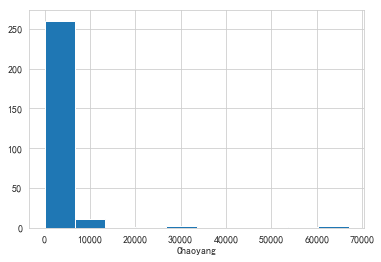

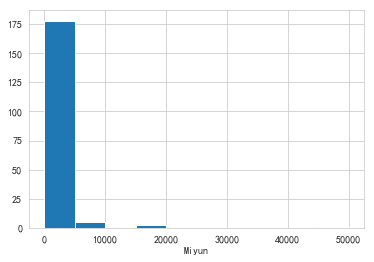

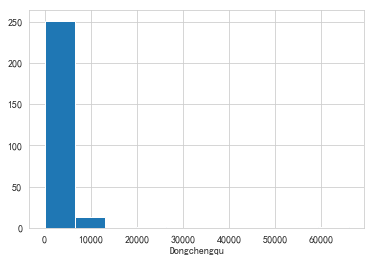

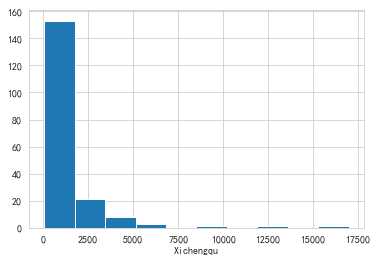

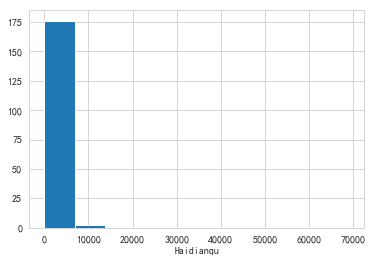

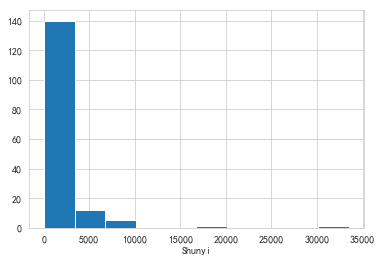

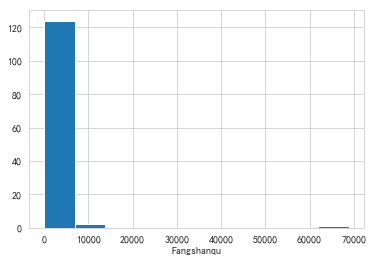

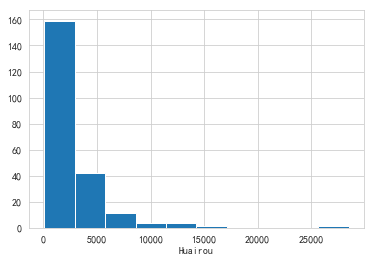

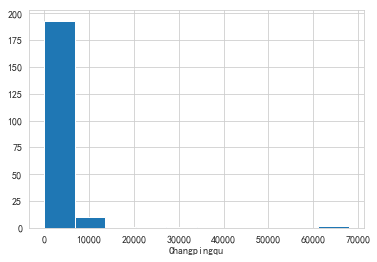

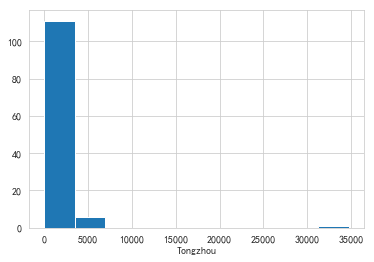

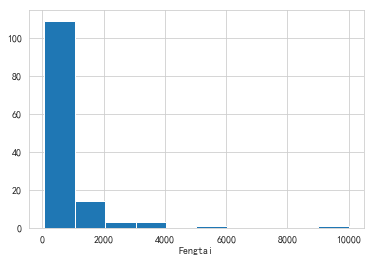

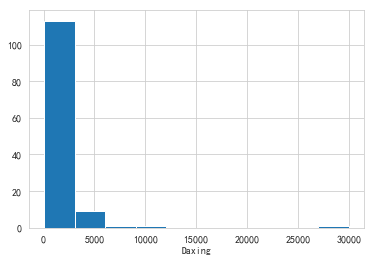

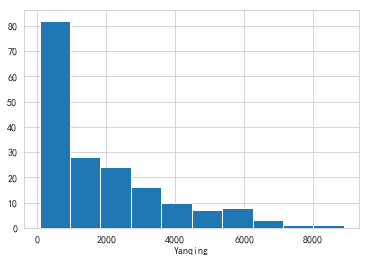

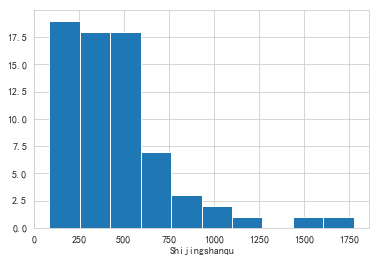

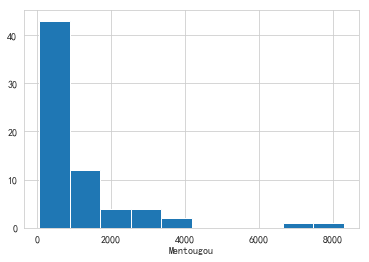

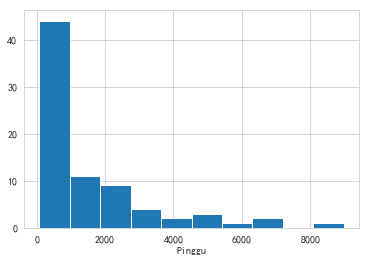

In [10]:
plt.rcParams['font.sans-serif']='SimHei'
data1["calculated_host_listings_count"].describe()
host_name=data1[["host_name","name"]].groupby("host_name").count().sort_values(by="name",ascending=False)
host_name.head()


# 查看各个地区的价格情况的直方图，了解价格变化情况，进一步分析价格的影响因素是否受到位置的影响

a=data1[["neighbourhood","price"]].groupby(["neighbourhood","price"]).count().reset_index()
label2=data1.neighbourhood.unique().tolist()
for i in label2:
    plt.hist(a[a["neighbourhood"]==i].price)
    plt.xlabel(i)
    plt.show()

 1.房东存在极值，存在团队运营多套房产获取收益.后续分析可根据房屋数量把房东划分为不同的类型，估算其收益.
 2.通过绘制的各地区的价格直方图可以看出，大多数地区的价格呈现偏态分布，不同的地区的分布形态差异很大，说明地区对价格的影响巨大

### 对房间分布位置进行分析

Text(0.5, 1.0, '民宿分布区域占比图')

<Figure size 3600x1440 with 0 Axes>

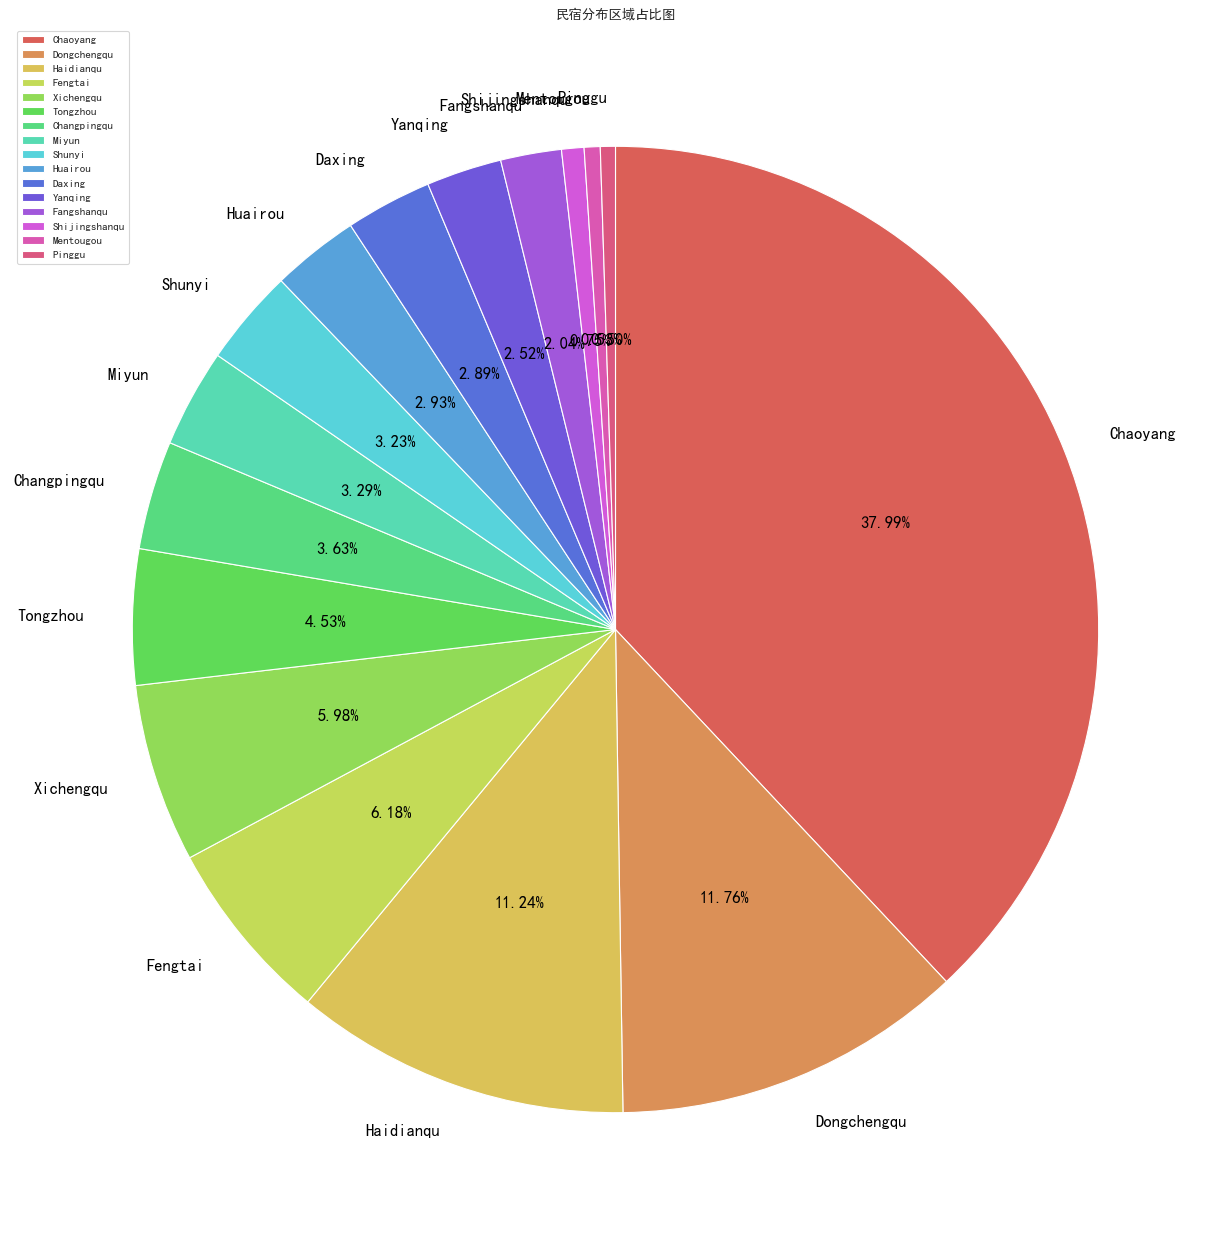

In [11]:
plt.rcParams['font.sans-serif']='SimHei'  #用来显示中文标签
plt.figure(figsize=(50,20))
#sns.countplot(x="neighbourhood",data=data)

# 绘制饼图更加直观的显示,由seaborn绘制的图形可以看出，东城区、朝阳区、海淀区分布最多，可以突出显示

label=data.neighbourhood.value_counts().index
explode={}
for i in label:
    if  i in ["东城区","朝阳区","海淀区"]:
        explode[i]=0.02
    else:
        explode[i]=0

neighbourhood_data=data["neighbourhood"].value_counts()
plt.figure(figsize=(20,20),dpi=80)
plt.pie(neighbourhood_data,labels=label,explode=explode.values(),
        autopct="%.2f%%",textprops={'fontsize':15,'color':'black'},startangle=90,
        counterclock=False,colors=sns.color_palette('hls',n_colors=16))
plt.legend(loc="best")
plt.title("民宿分布区域占比图")

通过对图形的观察，可以看出各个特征之间都存在一定的联系，接下来则是对多个变量进行综合考虑

1.number_of_reviews与review_per_month之间的相关系数达到了0.49,就图所反映的数据而言，已经彰显很强的相关性，可以分析一下

关于位置的经纬度变量则可以利用其他库进行分析

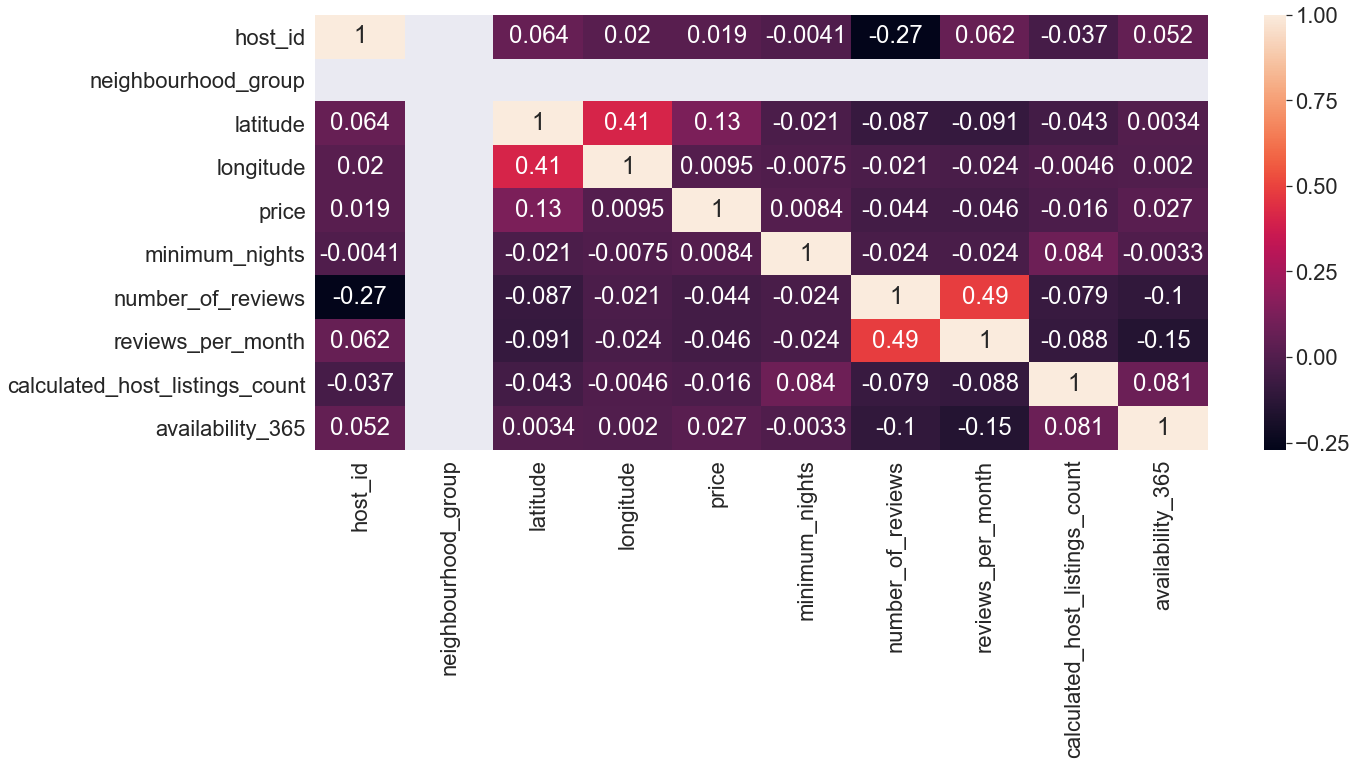

In [12]:
# 生成配对图进行特征比较

sns.set_style("dark")
plt.rcParams['font.sans-serif']='SimHei' 
# fig,ax=plt.subplots(211)
plt.figure(figsize=(20,8))
#sns.pairplot(data,x_vars=["neighbourhood","room_type","calculated_host_listings_count"],y_vars=["price","number_of_reviews","minimum_nights"])

# 建立的子集图显示的比较模糊，可以选择热力图进行比较特征

sns.set(font_scale=2)
sns.heatmap(data1.corr(),annot=True)  # 查看各个变量之间的相关关系，进一步分析相关系数高的变量

### 价格分布

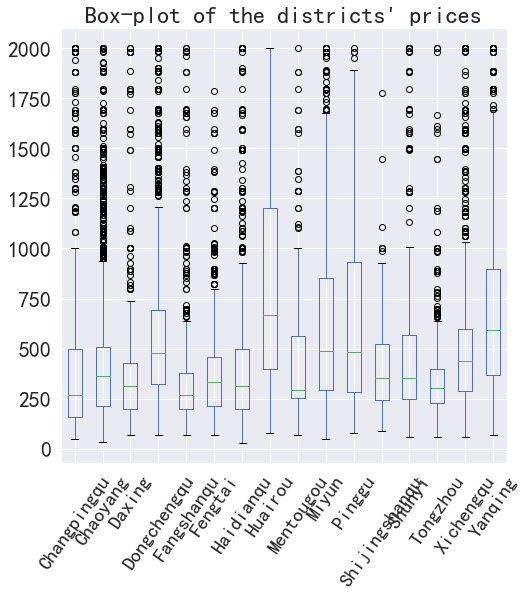

Distributions of price and availability:


,price,availability_365
count,28452.000000,28452.000000
mean,611.203325,220.342120
std,1623.535077,138.430677
min,0.000000,0.000000
25%,235.000000,87.000000
50%,389.000000,209.000000
75%,577.000000,361.000000
max,68983.000000,365.000000


In [13]:
h_p_d=data[(data['price']<=2000)&(data['price']>0)].groupby('neighbourhood')['price']
h_p_d1=pd.DataFrame()
h_p_d2=pd.DataFrame()
fig=plt.figure(figsize=(8,8))
ax=plt.axes()
for i,j in h_p_d:
    h_p_d1=pd.DataFrame()
    h_p_d1[i]=j.values
    h_p_d2=pd.concat([h_p_d2,h_p_d1],axis=1)
h_p_d2.boxplot(showfliers=True)
sns.set_style("dark")
plt.rcParams['font.sans-serif']='SimHei' 
plt.xticks(size='small',rotation=55)
plt.title("Box-plot of the districts' prices")
plt.show()
print("Distributions of price and availability:")
data[['price', 'availability_365']].describe()

In [14]:
print("Prices per district:")
data.groupby(['neighbourhood', 'room_type']).agg({'price': ['min', 'mean', 'max', 'std']})

Prices per district:


price                                  
                                min         mean    max           std
neighbourhood room_type                                              
Changpingqu   Entire home/apt    67  1628.799625  30197   2492.732894
              Private room       60   584.200436  66667   3178.867921
              Shared room        47  1873.658537  67909  10580.823308
Chaoyang      Entire home/apt    54   623.355146  67104   1778.034257
              Private room        0   309.395969  30002    680.001061
              Shared room        60   208.511876  30002   1153.058289
Daxing        Entire home/apt   134   537.644444   8891    692.520660
              Private room       67   403.422481  30002   1961.814237
              Shared room        74   339.280000   3067    680.165637
Dongchengqu   Entire home/apt     0   792.776293  65970   1694.499292
              Private room       67   586.352413  13582    957.499217
              Shared room        67   163.244444   1201    168.662936
Fangshanqu    Entire home/apt    87   794.234637  68828   3704.072981
              Private room       67   446.226415   9998    894.890205
              Shared room        81  1588.000000   9998   3320.268476
Fengtai       Entire home/apt   101   463.656754   9998    409.588639
              Private room       67   250.298246   3691    259.070797
              Shared room        67   130.576000   1007     96.376384
Haidianqu     Entire home/apt    74   623.857891  68983   1828.915515
              Private room       60   295.461483  12998    521.713260
              Shared room        27   340.544218  59997   3492.673701
Huairou       Entire home/apt   134  2161.593052  13287   1804.032157
              Private room       81  1046.938095  28499   2014.129434
              Shared room       302  1344.900000   3879   1091.197451
Mentougou     Entire home/apt    67   709.541284   8301   1224.885879
              Private room       81   935.333333   2986    661.877407
              Shared room        67   105.750000    168     48.685213
Miyun         Entire home/apt   121  1198.298387  19997   1556.553120
              Private room       47   711.877880  49999   2509.330955
              Shared room       127   159.800000    195     27.580790
Pinggu        Entire home/apt   168  1443.929412   8978   1723.170885
              Private room       81   810.363636   6717   1267.627433
              Shared room        81   110.000000    148     34.394767
Shijingshanqu Entire home/apt   101   462.859259   1778    217.051654
              Private room       87   315.600000   1107    223.838930
              Shared room       107   159.000000    268     52.712156
Shunyi        Entire home/apt    67   764.500000  33471   1800.120846
              Private room       60   454.555118   9998    793.175194
              Shared room        60   344.500000   2000    476.284807
Tongzhou      Entire home/apt    81   430.109691   6979    522.502880
              Private room       67   256.470000   4469    309.064706
              Shared room        60   830.254902  34699   4845.302095
Xichengqu     Entire home/apt    67   669.287524  16977    877.430204
              Private room       67   506.394958   8898    603.744193
              Shared room        60   152.150000    684    121.605931
Yanqing       Entire home/apt   101  1740.385870   8891   1533.824860
              Private room       67   707.394813   6180    817.169539
              Shared room       980  1221.333333   1496    259.609964

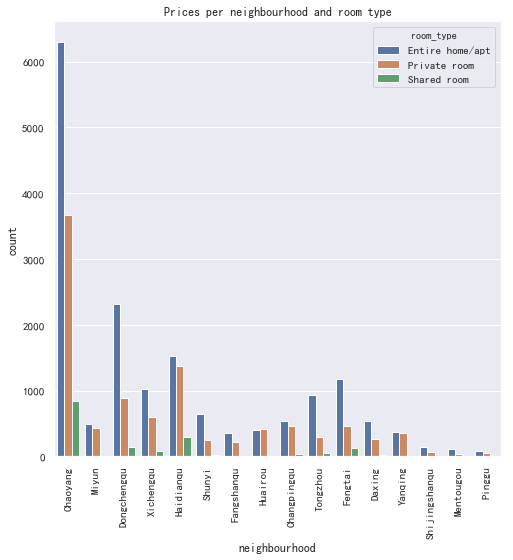

In [15]:
sns.set_style("dark")
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="neighbourhood", hue="room_type", data=data)
plt.rcParams['font.sans-serif']='SimHei'
plt.xticks(rotation=90)
plt.title("Prices per neighbourhood and room type")
plt.show()

## 多变量分析-对多个关键变量进行交叉分析，探究数据的意义

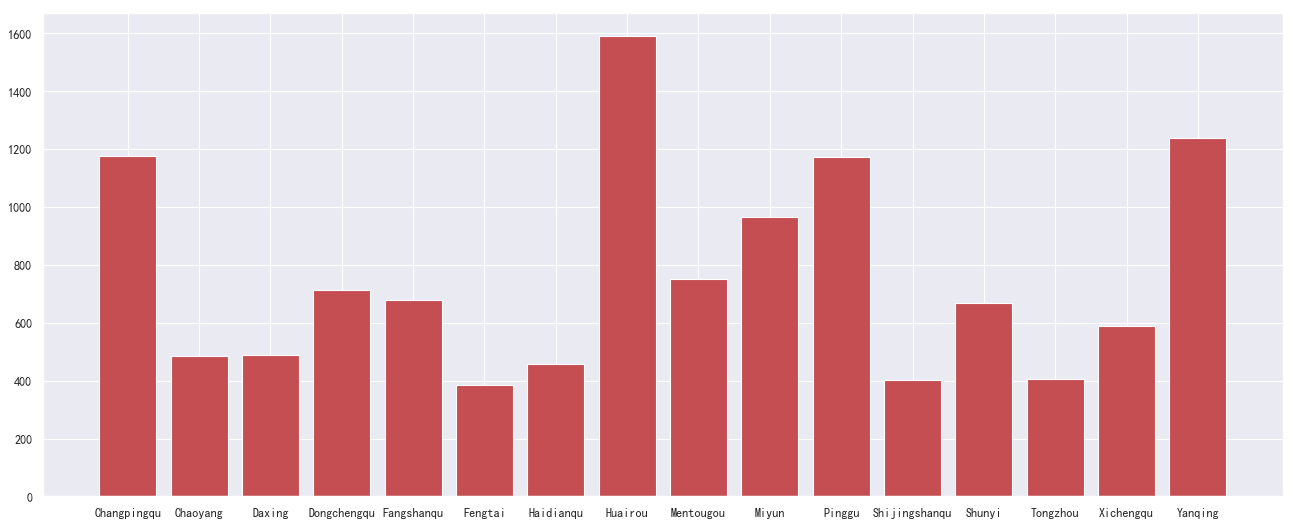

In [16]:
"""查看区域和价格之间的关系，绘制直方图或者配对图,创建一个数据透视表"""

neighbourhood_price=pd.pivot_table(data,index="neighbourhood",values="price",aggfunc=np.mean)
neighbourhood_price.head()
plt.figure(figsize=(20,8),dpi=80)
plt.bar(neighbourhood_price.index,neighbourhood_price.price,color="r")
plt.rcParams['font.sans-serif']='SimHei' 

通过前面的图形结合现在的图可以得到，东城区、西城区、海淀区的性价比最高，价格在600-1000之间，处于中等水平，既在三环附近，平均住宿价格也处于中等水平，广受欢迎， 而其他地区性价比明显偏低，不能满足普通短租者的期望，由于主要考虑的是地理位置与价格的因素，在此暂时忽略其他因素的影响

### 受欢迎的民宿的特征

In [17]:
# 研究受欢迎的民宿有哪些特征，这里暂时定义每一条评论代表一位租客(可能存在恶意刷评的情况，这里不予考虑)
# 定义评论数大于中位数的即为受欢迎的民宿

avg_number=data["number_of_reviews"].mean()
popular_house=data[data["number_of_reviews"]>avg_number]
popular_house_10=popular_house.sort_values(by="number_of_reviews",ascending=False).head(10)
popular_house_10.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,
6622351,梵溪 故宫旁 日式花园庭院 禅意卧房,26047033,Jim,Dongchengqu,39.92917,116.40344,Private room,537,1,322,2019-04-13,6.82,4,339
6596814,隐庐 故宫旁 日式花园庭院 新中式LOFT套房,26047033,Jim,Dongchengqu,39.92597,116.39673,Entire home/apt,899,1,284,2019-03-13,6.03,4,345
11911698,"东直门,紧邻地铁,温馨聚会空间",24896768,Han,Chaoyang,39.94084,116.44843,Entire home/apt,960,1,264,2019-04-03,7.27,4,352
128496,Heart of Beijing: House with View 2,467520,Cindy,Dongchengqu,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
13506068,"【留凉】雍和宫附近的吃货天堂,居心地のいい部屋,温柔猫咪,全新家具",77464746,Lene,Chaoyang,39.95410,116.42731,Private room,228,1,240,2019-04-08,7.27,1,300


可以看出，在最受欢迎的民宿中，都位于一环附近，为北京最繁华的地段，价格存在极值，但是平均价格为500左右，可以让大多数人接受的性价比.进一步发现大多为私人或者整套房间出租，公共房间只有极少数，而且受欢迎的民宿的房东大多运营者几套房产，说明团体的运营效果很好，能吸引更多的顾客.而单体房东只占少数一两个.

### 建立位置、价格、房屋类型、评论数的透视表

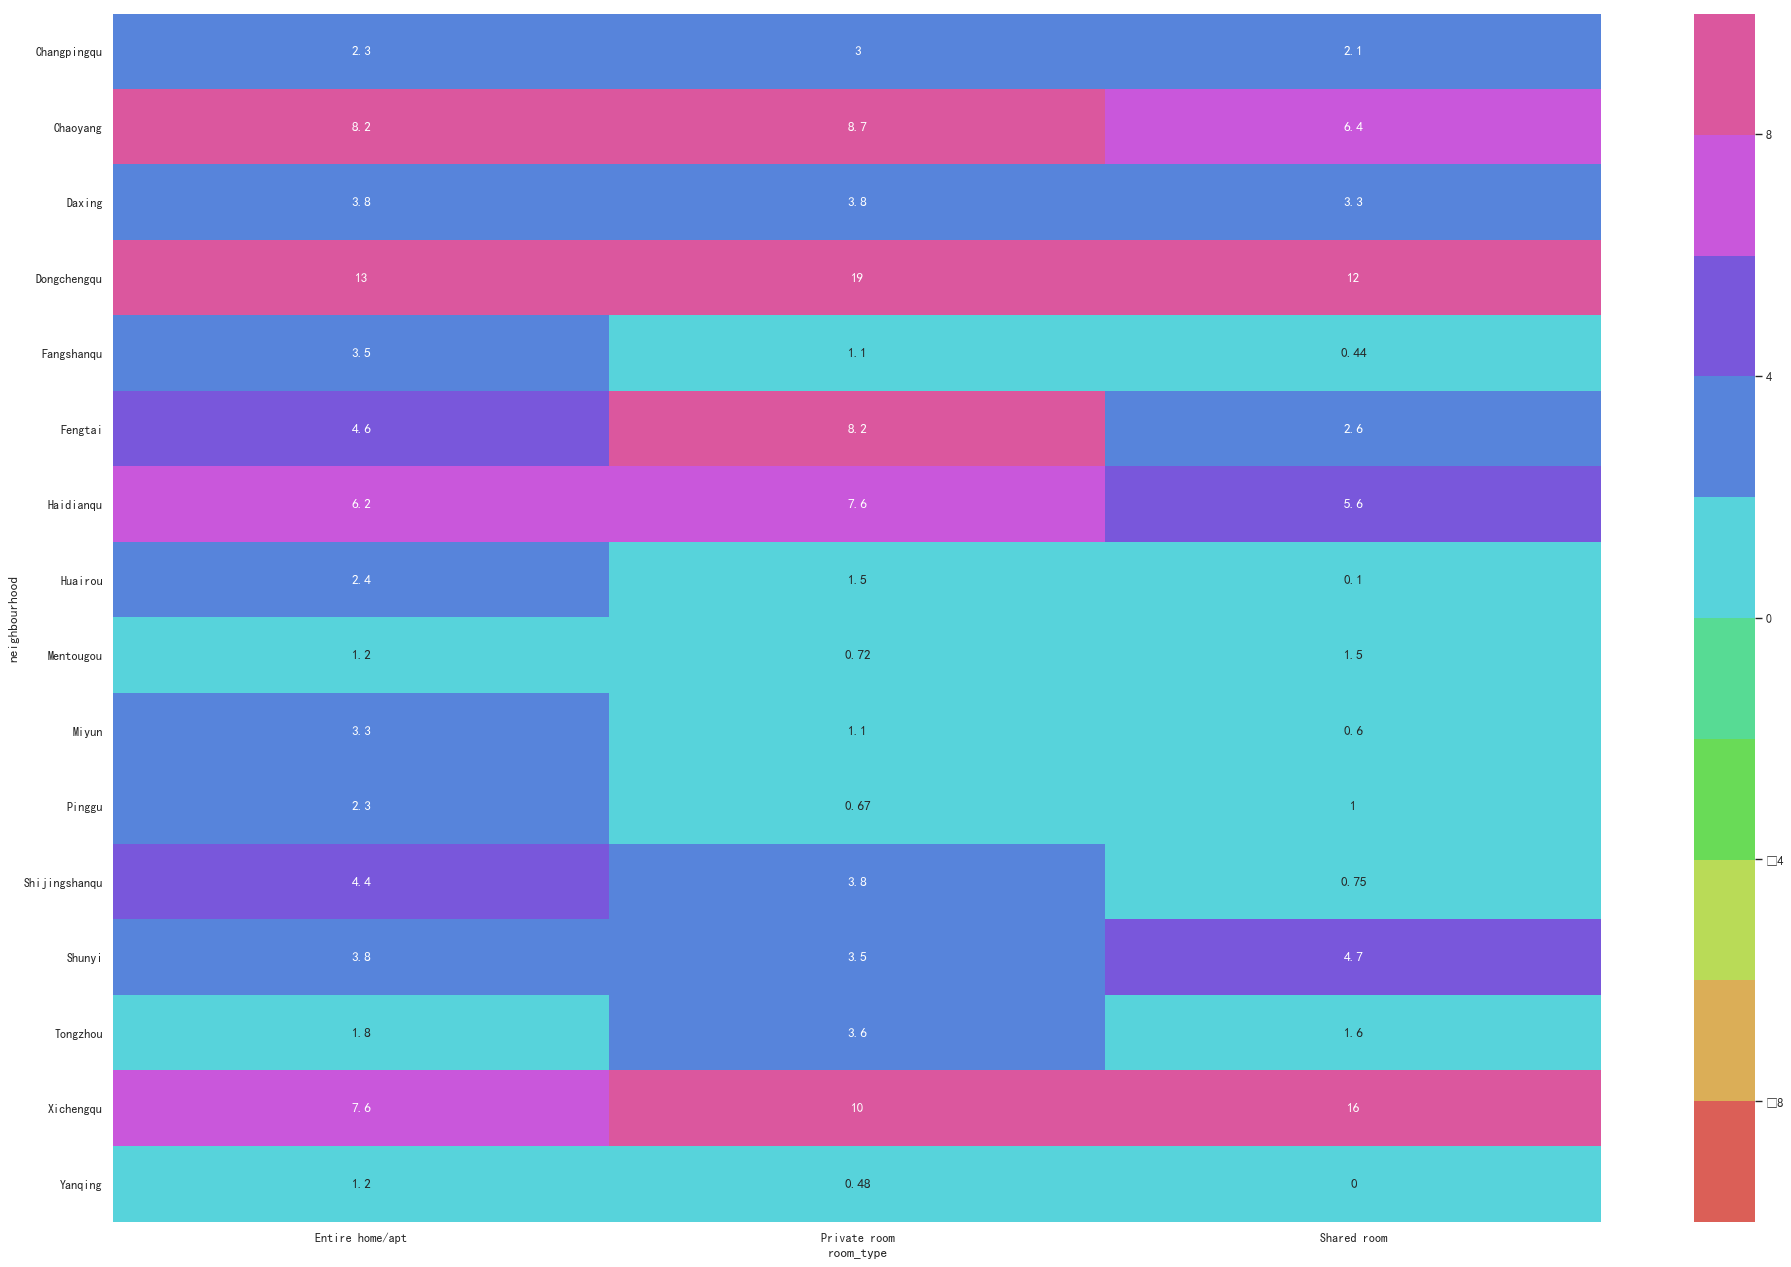

In [18]:
tables=pd.pivot_table(data,index="neighbourhood",values=["number_of_reviews","price"],columns="room_type",aggfunc=np.mean)
plt.figure(figsize=(30,20),dpi=80)
sns.heatmap(tables.number_of_reviews,vmin=-10,vmax=10,annot=True,cmap=sns.color_palette('hls',n_colors=10))

# Geoposition Analysis

In [19]:
import geopandas as gpd
from shapely.geometry import Point
import missingno as msn
from matplotlib.font_manager import FontProperties

In [20]:
path = '.\\short_term_rental_dataset\\'
neighbourhoods = gpd.read_file(path+'neighbourhoods.geojson')
calendar_detail = pd.read_csv(path+"calendar_detail.csv")
listings = pd.read_csv(path+"listings.csv")
listings_detail = pd.read_csv(path+"listings_detail.csv")
listings_detail["weekly_price"]

0        $7,938.00
1        $7,200.00
2        $3,020.00
3        $3,288.00
4        $3,758.00
           ...    
28447          NaN
28448          NaN
28449          NaN
28450          NaN
28451          NaN
Name: weekly_price, Length: 28452, dtype: object

In [21]:
listings_detail["weekly_price"]

0        $7,938.00
1        $7,200.00
2        $3,020.00
3        $3,288.00
4        $3,758.00
           ...    
28447          NaN
28448          NaN
28449          NaN
28450          NaN
28451          NaN
Name: weekly_price, Length: 28452, dtype: object

In [22]:
listings_detail["monthly_price"]

0        $26,170.00
1        $28,800.00
2               NaN
3        $10,737.00
4        $10,737.00
            ...    
28447           NaN
28448           NaN
28449           NaN
28450           NaN
28451           NaN
Name: monthly_price, Length: 28452, dtype: object

In [23]:
listings_detail["bathrooms"].unique()

array([  2. ,   1. ,   nan,   8. ,   0.5,   1.5,   4. ,   2.5,   3. ,
         0. ,   5. ,   6. ,   7. , 101.5,   9. ,   3.5,   4.5,  10. ,
         8.5,  11. ,   5.5,   7.5,  14. ,   9.5,  12. ,  16. ,  11.5,
        20. ,   6.5,  16.5,  12.5,  17. ,  18. ,  50. ])

In [24]:
for i in listings_detail.columns:
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

### 北京地图

In [25]:
beijing_map = gpd.read_file(".\\short_term_rental_dataset\\neighbourhoods.geojson")
nbh = beijing_map.neighbourhood
nbh = [x.split("/")[-1].strip().lower() for x in nbh]
nbh = [pinyin.get(x, format="strip", delimiter="").capitalize() for x in nbh]

beijing_map['neighbourhood'] = nbh

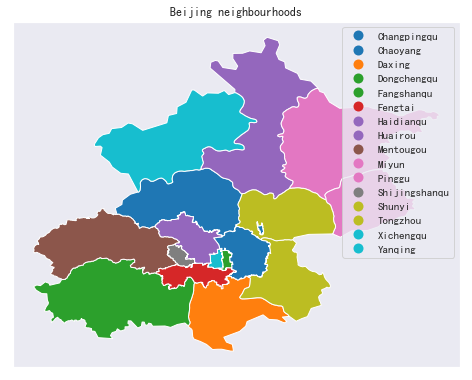

In [26]:
points = gpd.GeoDataFrame({'geometry': [Point(x,y) for x,y in zip(listings.longitude, listings.latitude)]})
beijing_map.plot(column="neighbourhood", edgecolor="white", legend=True, figsize=(8,8))
plt.title("Beijing neighbourhoods")
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

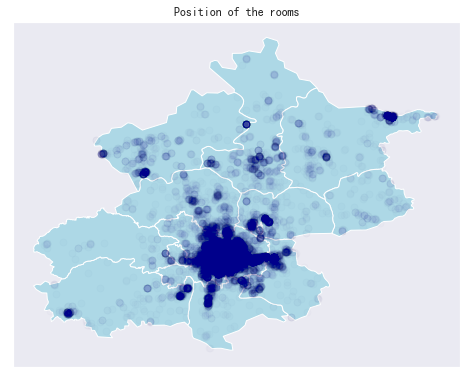

In [27]:
beijing = beijing_map.plot(color="lightblue", edgecolor="white", figsize=(8,8))
points.plot(ax=beijing, color='darkblue', marker="o", markersize=50, alpha=0.01)
plt.title("Position of the rooms")
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

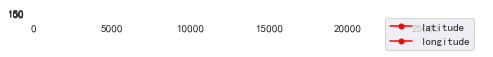

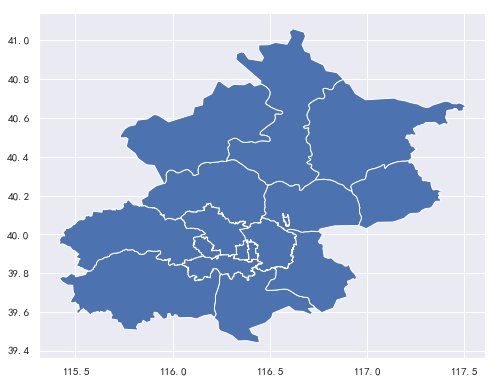

In [67]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

neighbourhoods.plot()
listings_detail[["latitude", "longitude"]].plot(ax=ax, marker='o', color='red', markersize=5)
plt.savefig('beijing2.png')
plt.show()

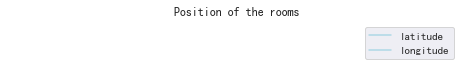

In [29]:
points = gpd.GeoDataFrame({'geometry': [Point(x,y) for x,y in zip(listings.longitude, listings.latitude)]})
beijing = listings_detail[["latitude", "longitude"]].plot(color="lightblue", figsize=(8,8))
points.plot(ax=beijing, color='darkblue', marker="o", markersize=50, alpha=0.01)
plt.title("Position of the rooms")
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

In [30]:
neighbourhoods["neighbourhood"]=["东城区", "西城区", "昌平区", "大兴区",
                                "房山区", "怀柔区", "门头沟", "密云县",
                                "平谷区", "延庆县", "朝阳区", "丰台区",
                                "海淀区", "顺义区", "通州区", "石景山"]

In [31]:
distinctsummary = pd.DataFrame(pd.read_csv(path+'summary2.csv',encoding='utf-8')) 
distinctsummary['Unnamed: 0'] = ["朝阳区", "密云县", "东城区", "西城区",
                                 "海淀区", "顺义区", "房山区", "怀柔区",
                                 "昌平区", "通州区", "丰台区", "大兴区",
                                 "延庆县", "石景山", "门头沟", "平谷区"]
distinctsummary.rename(columns={'Unnamed: 0':'district'}, 
                 inplace=True)

In [32]:
merged = neighbourhoods.set_index('neighbourhood').join(distinctsummary.set_index('district'))
merged.columns = ['neighbourhood_group', 'geometry', 'total_number',
       'Entire_home/apt_number', 'Private_room_number', 'Shared_room_number',
       'average_price', 'average_listings_count', 'average_availability']
merged

,neighbourhood_group,geometry,total_number,Entire_home/apt_number,Private_room_number,Shared_room_number,average_price,average_listings_count,average_availability
neighbourhood,,,,,,,,,
东城区,None,"MULTIPOLYGON (((116.44231 39.90180, 116.44246 ...",3344,2318,891,135,712.834629,12.712022,195.857955
西城区,None,"MULTIPOLYGON (((116.39155 39.89710, 116.39157 ...",1701,1026,595,80,587.987066,10.584950,207.766608
昌平区,None,"MULTIPOLYGON (((116.04274 40.08406, 116.03750 ...",1034,534,459,41,1174.803675,4.620890,221.712766
大兴区,None,"MULTIPOLYGON (((116.73473 39.62160, 116.69884 ...",823,540,258,25,489.541920,6.505468,250.302552
房山区,None,"MULTIPOLYGON (((116.24662 39.79181, 116.24320 ...",579,358,212,9,679.150259,5.300518,243.696028
怀柔区,None,"MULTIPOLYGON (((116.27899 40.37974, 116.27943 ...",833,403,420,10,1589.777911,5.384154,254.716687
门头沟,None,"MULTIPOLYGON (((115.56297 39.81206, 115.56156 ...",152,109,39,4,751.585526,4.125000,239.309211
密云县,None,"MULTIPOLYGON (((116.88258 40.79685, 116.89160 ...",935,496,434,5,966.962567,5.524064,226.619251
平谷区,None,"MULTIPOLYGON (((117.38129 40.22541, 117.38304 ...",143,85,55,3,1172.265734,3.951049,206.622378


In [33]:
for idx, row in merged.iterrows() :
    print (row)

neighbourhood_group                                                    None
geometry                  (POLYGON ((116.442305 39.9018, 116.442461 39.9...
total_number                                                           3344
Entire_home/apt_number                                                 2318
Private_room_number                                                     891
Shared_room_number                                                      135
average_price                                                       712.835
average_listings_count                                               12.712
average_availability                                                195.858
Name: 东城区, dtype: object
neighbourhood_group                                                    None
geometry                  (POLYGON ((116.391555 39.897097, 116.391571 39...
total_number                                                           1701
Entire_home/apt_number                                         

### 分地区统计可得性

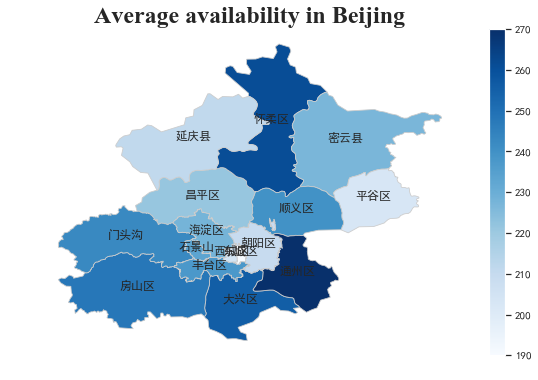

In [34]:
variable = 'average_availability'
vmin, vmax = 190, 270
fig, ax = plt.subplots(1, figsize=(10, 6))
ChineseFont = FontProperties('SimHei')
merged.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor= "0.8")
ax.axis('off')

ax.set_title('Average availability in Beijing', fontdict={'fontsize': '24', 'fontweight' : '4',
                                                         'fontname':'Times New Roman'})

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

for idx, row in merged.iterrows() :
    ax.text(row.geometry.centroid.coords[0][0], row.geometry.centroid.coords[0][1], 
            s=idx, horizontalalignment='center', fontproperties = ChineseFont)

fig.savefig('Average_availability.png', dpi=300)

### 分地区统计均价

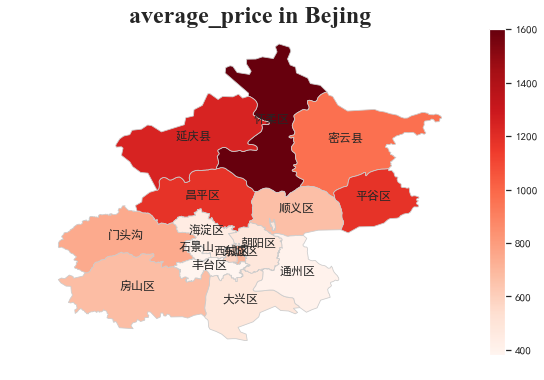

In [35]:
variable1 = 'average_price'
vmin, vmax = 380, 1600
fig1, ax1 = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable1, cmap="Reds", linewidth=0.8, ax=ax1, edgecolor= "0.8")
ax1.axis('off')

ax1.set_title('average_price in Bejing', fontdict={'fontsize': '24', 'fontweight' : '4',
                                                  'fontname':'Times New Roman'})

sm1 = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm1._A = []
cbar = fig1.colorbar(sm1)

for idx, row in merged.iterrows() :
    ax1.text(row.geometry.centroid.coords[0][0], row.geometry.centroid.coords[0][1], 
            s=idx, horizontalalignment='center', fontproperties = ChineseFont)
fig1.savefig('Average_price.png', dpi=300)

### 分地区统计总数

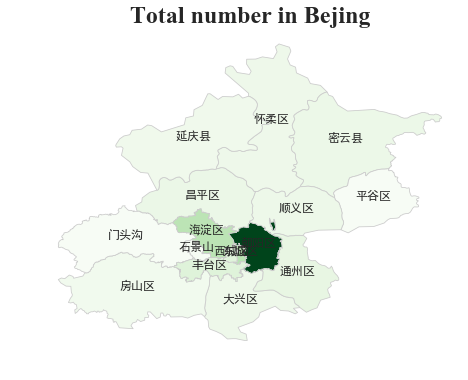

In [36]:
variable3 = 'total_number'
vmin, vmax = 100, 11000
fig3, ax3 = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable3, cmap="Greens", linewidth=0.8, ax=ax3, edgecolor= "0.8")
ax3.axis('off')

ax3.set_title('Total number in Bejing', fontdict={'fontsize': '24', 'fontweight' : '4',
                                                  'fontname':'Times New Roman'})

sm3 = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm3._A = []
#cbar = fig2.colorbar(sm3)

for idx, row in merged.iterrows() :
    ax3.text(row.geometry.centroid.coords[0][0], row.geometry.centroid.coords[0][1], 
            s=idx, horizontalalignment='center', fontproperties = ChineseFont)
fig3.savefig('Total_number.png', dpi=300)

### 分地区统计房屋数

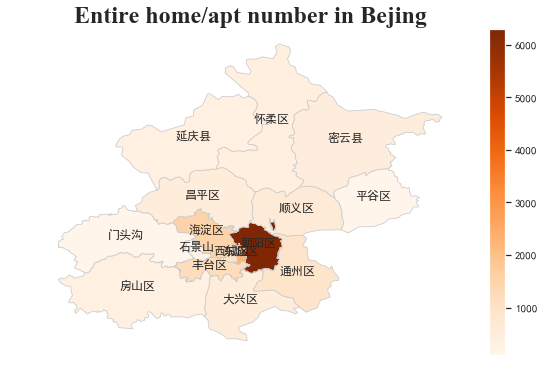

In [37]:
variable3 = 'Entire_home/apt_number'
vmin, vmax = 90, 6300
fig3, ax3 = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable3, cmap="Oranges", linewidth=0.8, ax=ax3, edgecolor= "0.8")
ax3.axis('off')

ax3.set_title('Entire home/apt number in Bejing', fontdict={'fontsize': '24', 'fontweight' : '4',
                                                  'fontname':'Times New Roman'})

sm3 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm3._A = []
cbar = fig3.colorbar(sm3)

for idx, row in merged.iterrows() :
    ax3.text(row.geometry.centroid.coords[0][0], row.geometry.centroid.coords[0][1], 
            s=idx, horizontalalignment='center', fontproperties = ChineseFont)
fig3.savefig('Entire_home,apt_numberr.png', dpi=300)

### 分地区统计私人房间数

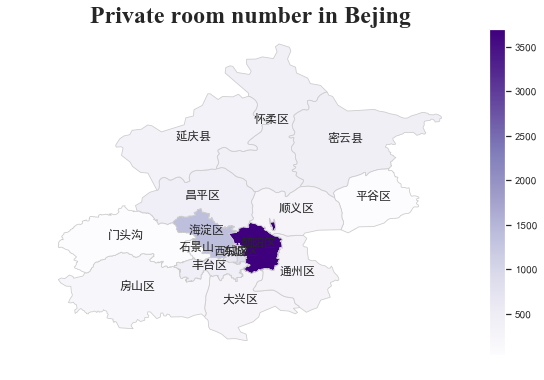

In [38]:
variable4 = 'Private_room_number'
vmin, vmax = 30, 3700
fig4, ax4 = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable4, cmap="Purples", linewidth=0.8, ax=ax4, edgecolor= "0.8")
ax4.axis('off')

ax4.set_title('Private room number in Bejing', fontdict={'fontsize': '24', 'fontweight' : '4',
                                                  'fontname':'Times New Roman'})

sm4 = plt.cm.ScalarMappable(cmap="Purples", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm4._A = []
cbar = fig4.colorbar(sm4)

for idx, row in merged.iterrows() :
    ax4.text(row.geometry.centroid.coords[0][0], row.geometry.centroid.coords[0][1], 
            s=idx, horizontalalignment='center', fontproperties = ChineseFont)
fig4.savefig('Private_room_numberr.png', dpi=300)

### 分地区统计共享房间数

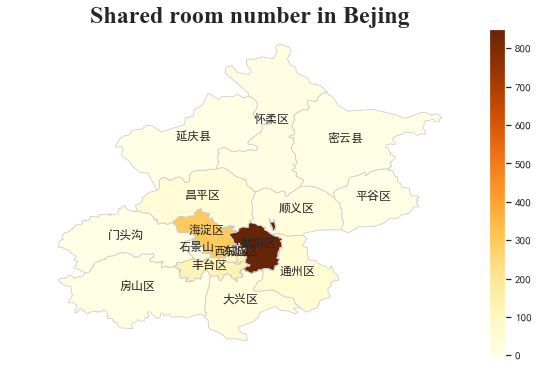

In [39]:
variable5 = 'Shared_room_number'
vmin, vmax = 0, 850
fig5, ax5 = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable5, cmap="YlOrBr", linewidth=0.8, ax=ax5, edgecolor= "0.8")
ax5.axis('off')

ax5.set_title('Shared room number in Bejing', fontdict={'fontsize': '24', 'fontweight' : '4',
                                                  'fontname':'Times New Roman'})

sm5 = plt.cm.ScalarMappable(cmap="YlOrBr", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm5._A = []
cbar = fig5.colorbar(sm5)

for idx, row in merged.iterrows() :
    ax5.text(row.geometry.centroid.coords[0][0], row.geometry.centroid.coords[0][1], 
            s=idx, horizontalalignment='center', fontproperties = ChineseFont)
fig5.savefig('Shared_room_number.png', dpi=300)

### 分地区统计列表

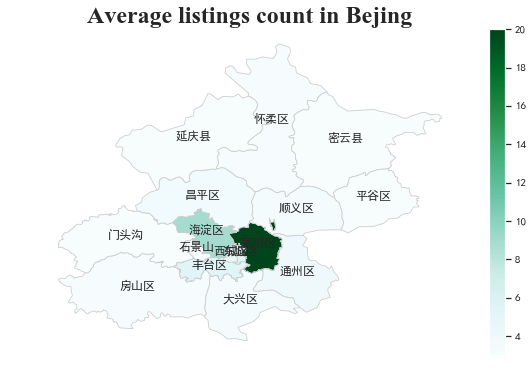

In [40]:
variable6 = 'average_listings_count'
vmin, vmax = 3, 20
fig6, ax6 = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable5, cmap="BuGn", linewidth=0.8, ax=ax6, edgecolor= "0.8")
ax6.axis('off')

ax6.set_title('Average listings count in Bejing', fontdict={'fontsize': '24', 'fontweight' : '4',
                                                  'fontname':'Times New Roman'})

sm6 = plt.cm.ScalarMappable(cmap="BuGn", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm6._A = []
cbar = fig6.colorbar(sm6)

for idx, row in merged.iterrows() :
    ax6.text(row.geometry.centroid.coords[0][0], row.geometry.centroid.coords[0][1], 
            s=idx, horizontalalignment='center', fontproperties = ChineseFont)
fig6.savefig('average_listings_count.png', dpi=300)

# Sentiment Analysis

In [41]:
from snownlp import SnowNLP
from textblob import TextBlob
import jieba
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime
pd.set_option('display.max_colwidth', -1)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing
import mapclassify
import pinyin
import PIL.Image as image
tokenizer = RegexpTokenizer('[a-zA-Z]\w+\'?\w*')
path ='.\\short_term_rental_dataset\\'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Read the reviews
reviews_detail = pd.read_csv(path+"reviews_detail.csv")
reviews_detail.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44054,84748,2010-08-25,207019,Jarrod,Sev was very helpful. Sev showed us where to shop and the prices we could expect to pay. Offered his assistance after handing us the room key. Sev is a great guy to deal with when visiting Beijing.
1,44054,118384,2010-10-13,218723,Kimberly,"We arrived in Beijing very early in the morning due to a delayed flight and Sev/East Apartments was very accommodating with helping us locate the building and getting us settled into the apartment. \r\nWe were traveling in a group of 5 and found this apartment to be perfect for us- we stayed in a 3 bedroom apartment and there was plenty of space as well as a kitchen, two bathrooms and a washer (although, the washer did dye one of my white shirts a faint green). \r\nOverall, we had a great time here and would definitely recommend it to anyone traveling to Beijing. The apartments look exactly like the photos that Sev has listed. \r\nIt is located Southeast of the city center and gave us a chance to explore another neighborhood. The subway line 10 Shaungjing stop is not a far walk and taxis in Beijing are very affordable. \r\nDid I mention that Sev is pretty cute?"
2,44054,436978,2011-08-11,609177,Emma,"It is a really massive apartment and really comfortable. Fully equipped for all you need in Beijing. Clean, nicely furnished and great size. \r\nSev is an excellent host, we couldn't have survived without him,. Always there to lend his advice and help. It was so helpful! We really appreciated him. Thank you :)"
3,44054,1118657,2012-04-12,1787536,Andreyna,"Sev was incredibly helpful, showed us around the neighborhood and was available in case any questions or concerns arose. Not only that but they also offered us a tour service to the great wall which was really good! \r\n\r\nThe apartment was well located with near access to the tube station (5min walk). There were lot of places to eat around too! \r\n\r\nI recommend it. :) Thanks for everything Sev."
4,44054,2140650,2012-08-30,1179565,Frances,"The appartment was ideal for our party of 6 adults; it was spacious, clean and conveniently located in an appartment complex with subway, shops, restaurants within walking distance. We were always able to contact Sev if we had any problem with our accommodation. We would recommend these serviced appartments for a stay in Beijing."


## 给评论打分

In [43]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
sia = SentimentIntensityAnalyzer()
reviews_sentiment = reviews_detail[['listing_id', 'comments']].copy()

In [45]:
reviews_sentiment['neg'] = reviews_sentiment['comments'].apply(lambda x: sia.polarity_scores(str(x))['neg'])
reviews_sentiment['neu'] = reviews_sentiment['comments'].apply(lambda x: sia.polarity_scores(str(x))['neu'])
reviews_sentiment['pos'] = reviews_sentiment['comments'].apply(lambda x: sia.polarity_scores(str(x))['pos'])
reviews_sentiment['compound'] = reviews_sentiment['comments'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
reviews_sentiment.head()

,listing_id,comments,neg,neu,pos,compound
0,44054,Sev was very helpful. Sev showed us where to shop and the prices we could expect to pay. Offered his assistance after handing us the room key. Sev is a great guy to deal with when visiting Beijing.,0.033,0.798,0.169,0.7778
1,44054,"We arrived in Beijing very early in the morning due to a delayed flight and Sev/East Apartments was very accommodating with helping us locate the building and getting us settled into the apartment. \r\nWe were traveling in a group of 5 and found this apartment to be perfect for us- we stayed in a 3 bedroom apartment and there was plenty of space as well as a kitchen, two bathrooms and a washer (although, the washer did dye one of my white shirts a faint green). \r\nOverall, we had a great time here and would definitely recommend it to anyone traveling to Beijing. The apartments look exactly like the photos that Sev has listed. \r\nIt is located Southeast of the city center and gave us a chance to explore another neighborhood. The subway line 10 Shaungjing stop is not a far walk and taxis in Beijing are very affordable. \r\nDid I mention that Sev is pretty cute?",0.025,0.804,0.171,0.9725
2,44054,"It is a really massive apartment and really comfortable. Fully equipped for all you need in Beijing. Clean, nicely furnished and great size. \r\nSev is an excellent host, we couldn't have survived without him,. Always there to lend his advice and help. It was so helpful! We really appreciated him. Thank you :)",0.035,0.535,0.430,0.9838
3,44054,"Sev was incredibly helpful, showed us around the neighborhood and was available in case any questions or concerns arose. Not only that but they also offered us a tour service to the great wall which was really good! \r\n\r\nThe apartment was well located with near access to the tube station (5min walk). There were lot of places to eat around too! \r\n\r\nI recommend it. :) Thanks for everything Sev.",0.000,0.695,0.305,0.9805
4,44054,"The appartment was ideal for our party of 6 adults; it was spacious, clean and conveniently located in an appartment complex with subway, shops, restaurants within walking distance. We were always able to contact Sev if we had any problem with our accommodation. We would recommend these serviced appartments for a stay in Beijing.",0.044,0.770,0.185,0.8225


In [46]:
reviews_sentiment['sentiment'] = "neutral"
reviews_sentiment['sentiment'].loc[reviews_sentiment['compound'].apply(lambda x: x >= 0.7)] = 'positive'
reviews_sentiment['sentiment'].loc[reviews_sentiment['compound'].apply(lambda x: x <= -0.1)] = 'negative'
reviews_sentiment.head(2)

,listing_id,comments,neg,neu,pos,compound,sentiment
0,44054,Sev was very helpful. Sev showed us where to shop and the prices we could expect to pay. Offered his assistance after handing us the room key. Sev is a great guy to deal with when visiting Beijing.,0.033,0.798,0.169,0.7778,positive
1,44054,"We arrived in Beijing very early in the morning due to a delayed flight and Sev/East Apartments was very accommodating with helping us locate the building and getting us settled into the apartment. \r\nWe were traveling in a group of 5 and found this apartment to be perfect for us- we stayed in a 3 bedroom apartment and there was plenty of space as well as a kitchen, two bathrooms and a washer (although, the washer did dye one of my white shirts a faint green). \r\nOverall, we had a great time here and would definitely recommend it to anyone traveling to Beijing. The apartments look exactly like the photos that Sev has listed. \r\nIt is located Southeast of the city center and gave us a chance to explore another neighborhood. The subway line 10 Shaungjing stop is not a far walk and taxis in Beijing are very affordable. \r\nDid I mention that Sev is pretty cute?",0.025,0.804,0.171,0.9725,positive


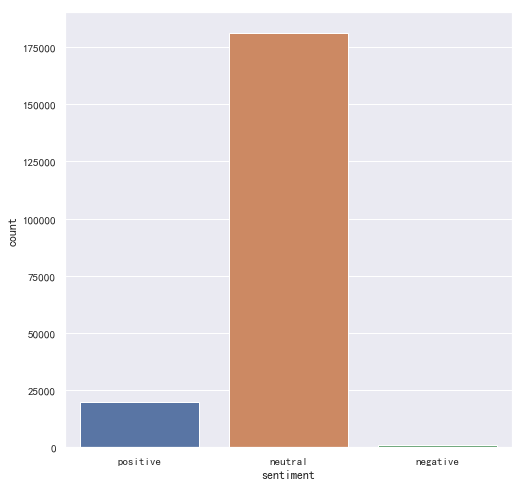

In [47]:
sns.countplot(data=reviews_sentiment, x='sentiment')

In [48]:
reviews_sentiment.loc[reviews_sentiment.sentiment.apply(lambda x: x != "neutral")].groupby(['listing_id', 'sentiment'])['pos'].count().head(10)

listing_id  sentiment
44054       negative     1  
            positive     40 
100213      positive     1  
128496      negative     6  
            positive     239
161902      negative     2  
            positive     19 
162144      negative     2  
            positive     18 
279078      negative     4  
Name: pos, dtype: int64

In [49]:
listing = pd.read_csv(path+"listings.csv", encoding="utf8")

nbh = listing.neighbourhood
nbh = [x.split("/")[-1].strip().lower() for x in nbh]
nbh = [pinyin.get(x, format="strip", delimiter="").capitalize() for x in nbh]

listing['neighbourhood'] = nbh

listings_sentiment = reviews_sentiment.groupby('listing_id')['compound'].mean().reset_index()
listings_sentiment = listings_sentiment.merge(listings, how="left", left_on="listing_id", right_on="id")
listings_sentiment.head(2)

,listing_id,compound,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44054,0.464639,44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
1,100213,0.489900,100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0


In [50]:
print("Top 3 good reviews:")
listings_sentiment[['listing_id', 'host_id', 'neighbourhood', 'room_type', 'compound']].sort_values(ascending=False, by='compound').head(3)

Top 3 good reviews:


,listing_id,host_id,neighbourhood,room_type,compound
91,3097388,5460330,朝阳区 / Chaoyang,Entire home/apt,0.9971
2864,18722477,64848343,朝阳区 / Chaoyang,Shared room,0.9949
10865,28429275,206627778,怀柔区 / Huairou,Private room,0.9930


In [51]:
print("Bottom 3 bad reviews:")
listings_sentiment[['listing_id', 'host_id', 'neighbourhood', 'room_type', 'compound']].sort_values(ascending=True, by='compound').head(3)

Bottom 3 bad reviews:


,listing_id,host_id,neighbourhood,room_type,compound
3063,19089155,133323536,怀柔区 / Huairou,Entire home/apt,-0.9493
3006,18977858,132297214,朝阳区 / Chaoyang,Shared room,-0.8920
5799,22991225,54436429,海淀区,Entire home/apt,-0.8817


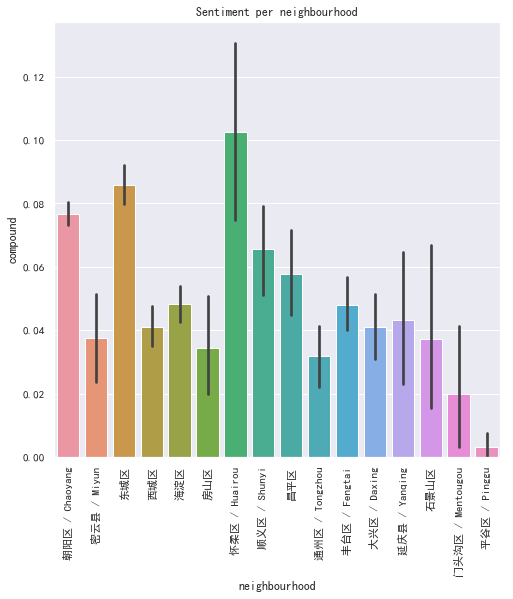

In [52]:
sns.barplot(data=listings_sentiment, y="compound", x="neighbourhood", estimator=np.mean)
plt.title("Sentiment per neighbourhood")
plt.xticks(rotation=90)
plt.show()

In [53]:
neg_listings = listings_sentiment.loc[listings_sentiment['compound'].apply(lambda x: x <= -0.2)]
neu_listings = listings_sentiment.loc[listings_sentiment['compound'].apply(lambda x: x > -0.2 and x < 0.7)]
pos_listings = listings_sentiment.loc[listings_sentiment['compound'].apply(lambda x: x >= 0.7)]

neg_points = gpd.GeoDataFrame({'geometry': [Point(x,y) for x,y in zip(neg_listings.longitude, neg_listings.latitude)]})
neu_points = gpd.GeoDataFrame({'geometry': [Point(x,y) for x,y in zip(neu_listings.longitude, neu_listings.latitude)]})
pos_points = gpd.GeoDataFrame({'geometry': [Point(x,y) for x,y in zip(pos_listings.longitude, pos_listings.latitude)]})

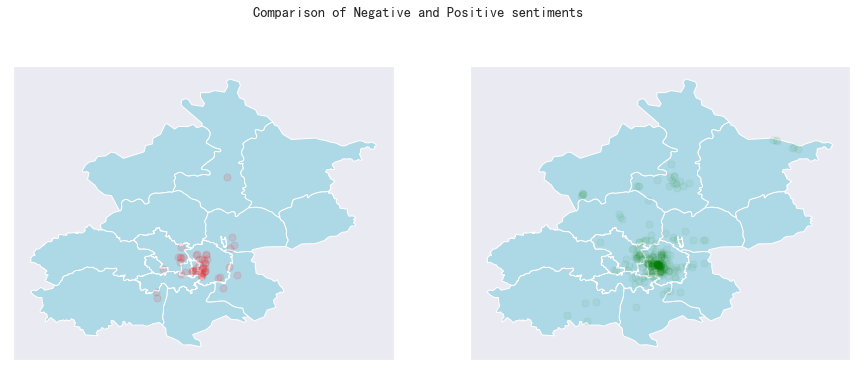

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6), squeeze=True)
beijing_map.plot(ax=ax1, color="lightblue", edgecolor="white")
neg_points.plot(ax=ax1, color='red', marker="o", markersize=50, alpha=0.1)
beijing_map.plot(ax=ax2, color="lightblue", edgecolor="white")
pos_points.plot(ax=ax2, color='green', marker="o", markersize=50, alpha=0.05)
ax1.xaxis.set_major_locator(plt.NullLocator())
ax1.yaxis.set_major_locator(plt.NullLocator())
ax2.xaxis.set_major_locator(plt.NullLocator())
ax2.yaxis.set_major_locator(plt.NullLocator())
plt.suptitle("Comparison of Negative and Positive sentiments")
plt.subplots_adjust()
plt.show()

## 词云图

In [55]:
comments = reviews_sentiment.merge(data1, how="left", left_on="listing_id", right_on="id").groupby('neighbourhood').agg({'comments': lambda x: ''.join(re.sub('[0-9\n]+', '', str(x.values)))})
#comments = comments.apply(lambda x: re.sub('[0-9\n]+', '', x[0]))
comments = [re.sub("[ ]+", " ", x) for x in comments.iloc[:,0]]
comments[0]

"['跟房东父母一起住的,房东父母是很和蔼友善的大爷大妈,有时候还有房东的孩子过来玩耍,挺有意思的' '好吧?' '特别干净整洁' ... '房主对房子的装修很用心,很干净,服务很周到｡比如我们要烧烤,立马给我们拿来了烧烤架｡村子很安静,适合一家人或者几家人聚会｡' '望山院子的设计风格和装潢装饰深得我心｡既保有乡村的质朴又透出摩登和精致｡住在这里既能感受到野趣又非常舒适自在｡无论是家具､饰品还是家电､用具､床品无不感受到房东的诚意和用心｡我这个艺术女生特别留意了房里不少的画作和摆设,不得不说,无论是配色､风格还是品质都很完美｡家电更是全到出乎我的意料:竟然有烤箱､咖啡机,甚至还有打泡机｡我这个嗜咖啡如命的人简直太感动｡\\n暖意融融的午后在院子里喝着高品质的咖啡晒太阳､爬简直就是自己的大峪山､黄昏和朋友烧烤喝啤酒､夜晚看久未谋面的满天星斗｡玩棋牌､聊天､看闲书､吃农家饭,这种真正生活的感觉真好!下次我要叫上朋友来村里采摘､去附近的公路骑行,或者就是单纯的为在静谧中睡去,在鸟鸣中醒来｡谢谢望山院子让我又满血复活｡' '老板很热心,有问题都会很耐心的讲解,房间很舒适,但是得自备毛巾,这点也可以理解,毕竟是私人物品,也是为了卫生考虑,充电器落在房间了,老板自掏腰包给我邮寄回来了,总体表现很满意,很舒心的一次入住,下次去北京还会住']"

In [56]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [57]:
listings_sentiment.columns

Index(['listing_id', 'compound', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [58]:
reviews_sentiment['is_chinese'] = reviews_sentiment.comments.apply(lambda x: True if len(re.findall(pattern="[a-zA-Z]+", string=str(x))) == 0 else False)
reviews_sentiment.is_chinese.value_counts()

True     145486
False    56613 
Name: is_chinese, dtype: int64

In [59]:
def trans_CN(text, is_chinese=True):
    if type(text) != str:
        text = str(text)
    # 接收分词的字符串
    word_list = jieba.cut(text, cut_all=False)
    # 分词后在单独个体之间加上空格
    if is_chinese:
        result = " ".join(word_list)
    else:
        result = "".join(word_list)
    return result

reviews_sentiment.loc[reviews_sentiment.is_chinese==True, "comments"] = reviews_sentiment[reviews_sentiment.is_chinese==True].comments.apply(trans_CN, is_chinese=True)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\DELL\AppData\Local\Temp\jieba.cache
Loading model cost 2.817 seconds.
Prefix dict has been built succesfully.


In [60]:
reviews_sentiment.loc[reviews_sentiment.is_chinese==False, "comments"] = reviews_sentiment[reviews_sentiment.is_chinese==False].comments.apply(trans_CN, is_chinese=False)

In [61]:
reviews_sentiment.loc[reviews_sentiment.is_chinese==False, "comments"].iloc[0]

'Sev was very helpful.  Sev showed us where to shop and the prices we could expect to pay.  Offered his assistance after handing us the room key.  Sev is a great guy to deal with when visiting Beijing.'

In [66]:
en_stop_words = set(stopwords.words('english'))
extended_stop_words = en_stop_words | \
                      {
                          'place;', 'host',
                          'stay','beijing', 'location', 'apartment'
                          'the','and'
                      }

In [64]:
text = ' '.join(reviews_sentiment[reviews_sentiment.sentiment != "neutral"].comments.astype(str).values)
# text = trans_CN(text)

In [71]:
from wordcloud import WordCloud

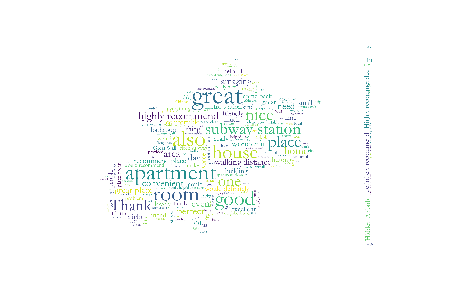

In [75]:
mask = np.array(image.open(r'Average_availability.png'))
font = r"C:\\Windows\Fonts\STSONG.TTF"
wc = WordCloud(mask=mask, font_path=font, stopwords=extended_stop_words, background_color="white").generate(text)
plt.imshow(wc)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
plt.show()
#wordcloud.to_file('english.png')

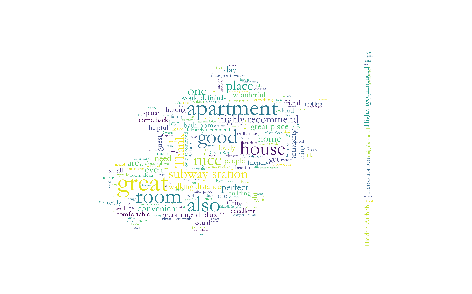

In [77]:
mask = np.array(image.open(r'Average_availability.png'))
font = r"C:\\Windows\Fonts\STSONG.TTF"
wc = WordCloud(mask=mask, font_path=font, stopwords=extended_stop_words, background_color="white").generate(text)
plt.imshow(wc)
ax = plt.axes()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
plt.show()
#wordcloud.to_file('english.png')

In [78]:
text_pos = ' '.join(reviews_sentiment[reviews_sentiment.sentiment=="positive"].comments.astype(str).values)
#text_pos = remove_stopwords(text_pos)
text_pos = trans_CN(text_pos)

text_neg = ' '.join(reviews_sentiment[reviews_sentiment.sentiment=="negative"].comments.astype(str).values)
#text_neg = remove_stopwords(text_neg)
text_neg = trans_CN(text_neg)

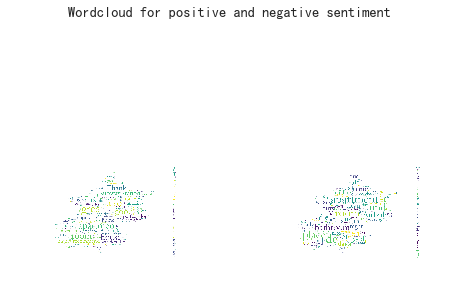

In [80]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
plt.subplot(121)
wc = WordCloud(mask=mask, font_path=font, stopwords=extended_stop_words, background_color="white").generate(text_pos)
plt.imshow(wc)
plt.subplot(122)
wc = WordCloud(mask=mask, font_path=font, stopwords=extended_stop_words, background_color="white").generate(text_neg)
plt.imshow(wc)
plt.suptitle("Wordcloud for positive and negative sentiment")
plt.subplots_adjust()
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.show()

# 价格预测

In [81]:
from sklearn.pipeline import Pipeline
import sklearn 
from sklearn import base
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split,GridSearchCV


# for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn import base,linear_model,metrics,ensemble,preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,auc
from sklearn.metrics import average_precision_score

In [82]:
x = pd.read_csv(path+'x.csv')
y = pd.read_csv(path+'y.csv')

## ColumnSelectTransformer

In [83]:
class ColumnSelectTransformer(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self, categorical_variables, numeric_variables): 
        # parameters taken by the transformer: a list of categorical_variables, a list of numeric_variables
        self.categorical_variables = categorical_variables  # We will need these in transform()
        self.numeric_variables     = numeric_variables
    
    def fit(self, X, y=None):
        # Create empty list to store encode fit
        self.label_encode = [] 
        self.OneHot_encode = []
        
        # fit LabelEncoder and OneHotEncoder to data
        for i, column in enumerate(self.categorical_variables):
            LE = LabelEncoder()                 # encode categorical variables as numeric
            OHE = OneHotEncoder( sparse=False)  # do one hot encoding
            OHE.fit(LE.fit_transform( X[column]).reshape(-1,1))
            self.label_encode.append( LE )    
            self.OneHot_encode.append( OHE )  
        return self
    
    def transform(self, X):
        X = X.reset_index() 
        df_cat = []  # empty list to store transformation result for each categorical variable
        
        # use LabelEncoder and OneHotEncoder to transform data
        for i, column in enumerate(self.categorical_variables):
            df_feature = self.OneHot_encode[i].transform(self.label_encode[i].transform( X[column]).reshape(-1,1))
            df_feature = pd.DataFrame(df_feature)
            df_feature.columns = [column  +'_'+str(x) for x in list(self.label_encode[i].classes_)]
            df_cat.append(df_feature)
            
        # Merge these dummary variables with numeric features: 
        df_numeric = X[self.numeric_variables]
        X = pd.concat([df_numeric]+ df_cat, axis=1) 
        
        return X 

In [89]:
X = x[x.columns[:3]]

In [119]:
CLASS_MAP={
    'Linear Reg':        linear_model.LinearRegression(),
    'Lasso Reg':         linear_model.Lasso(alpha=0.1),
    'Random Forest':     RandomForestRegressor(random_state=42),
    #'Gradient Boosting': GradientBoostingRegressor(n_estimators=10,min_samples_leaf=10,learning_rate=0.1,random_state=42,loss='ls'),
    #'XGBoost':           xgb.XGBRegressor(random_state=42)
}

In [120]:
#yvar: target variable name; xvar_num: x variable numerical name; xvar_cat: x variable category name
def Plot_tests( X_Train, y_Train, X_Test, y_Test,    yvar, xvar_num  ,
                CLASS_MAP = CLASS_MAP, plot_result= True, print_eval= True  , xvar_cat=None):
# choose evaluation 
    model_eval_col =  ['yvar', 'model', 'score', 'MAE','MSE', 'RMSE',
                       'score_train','MAE_train','MSE_train', 'RMSE_train']
    model_eval = pd.DataFrame(columns= model_eval_col) 
    CT = ColumnSelectTransformer(categorical_variables= xvar_cat,   numeric_variables= xvar_num)
    
    if plot_result ==True: 
        plt.figure(figsize= (5,5))

    for name, clf in CLASS_MAP.items():
        # train model
        model = Pipeline([
            ('clf', clf)       # classifier
        ])

        model.fit( X_Train, y_Train)
        # predict on test data
        y_pred = model.predict(X_Test)
        y_pred_Train = model.predict(X_Train)
        # Calcualte FPR, TPR for plotting ROC curve
        MAE   =  metrics.mean_absolute_error(y_Test, y_pred).round(6)
        MSE   =  metrics.mean_squared_error(y_Test, y_pred).round(6)
        RMSE  = np.sqrt(MSE).round(6)
        score = model.score(X_Test, y_Test)
        
        MAE_train   =  metrics.mean_absolute_error(y_Train, y_pred_Train).round(6)
        MSE_train   =  metrics.mean_squared_error( y_Train, y_pred_Train).round(6)
        RMSE_train  = np.sqrt(MSE_train).round(6)
        score_train = model.score(X_Train, y_Train)
        if plot_result ==True: 
            plt.scatter(y_Test, y_pred,  alpha = 0.3 ,s =15 , marker ='*',
                        label= name+', score= '+ str(round(score,3)))
            plt.legend(loc= 'upper left', framealpha=0.5)
            plt.xlabel('y_test')
            plt.ylabel('y_pred')
            
        model_eval = model_eval.append( pd.DataFrame([[yvar,    name, score, 
                       MAE,  MSE ,RMSE,score_train , MAE_train, MSE_train, RMSE_train ]],
                                columns = model_eval_col))

    return model_eval

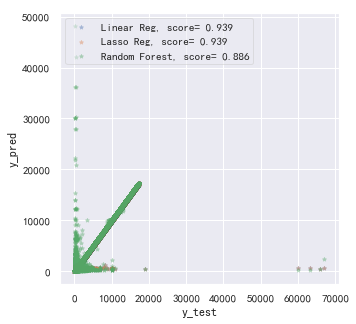

In [121]:
#yvar: target variable name; xvar_num: x variable numerical name; xvar_cat: x variable category name
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8)
xvar_cat=['minimum_nights','number_of_reviews', 'reviews_per_month',
                                                   'calculated_host_listings_count','neighbourhood_大兴区', 'neighbourhood_密云县', 'neighbourhood_平谷区',
                                                   'neighbourhood_延庆县', 'neighbourhood_怀柔区', 'neighbourhood_房山区',
                                                   'neighbourhood_昌平区', 'neighbourhood_朝阳区', 'neighbourhood_海淀区',
                                                   'neighbourhood_石景山', 'neighbourhood_西城区', 'neighbourhood_通州区',
                                                   'neighbourhood_门头沟', 'neighbourhood_顺义区', 'room_type_Entire home/apt',
                                                   'room_type_Private room', 'room_type_Shared room']
xvar_num=['availability_365', 'review_scores_rating', 'review_scores_accuracy',
                                                   'review_scores_cleanliness', 'review_scores_checkin',
                                                   'review_scores_communication', 'review_scores_location',
                                                   'review_scores_value']
result= Plot_tests( X_Train= X_train, y_Train= y_train, X_Test= X_test, y_Test= y_test, 
                       yvar = 'yvar', xvar_cat= xvar_cat, xvar_num = xvar_num,
                       CLASS_MAP = CLASS_MAP,  plot_result= True, print_eval= True  )